# Random Forests

Random forests are sets of deicision trees:

- With each descent on the decision tree, the goal is to reduce uncertainty.
- They divide a training set into random subsets and build a decision tree for each.
- More computationally expensive than decision trees, but they provide better classification boundaries.

Extreme random forests split the thresholds at each decision, too.

In [1]:
import numpy
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import ipywidgets as widgets
from IPython.display import display

import sys

sys.path.append("../")

from common import util, common_widgets

## Loading the Data

In [2]:
input_file = "data_random_forests.txt"
data = numpy.loadtxt(input_file, delimiter=",")
X, Y = data[:, :-1], data[:, -1]

classes = (
    numpy.array(X[Y == 0]),
    numpy.array(X[Y == 1]),
    numpy.array(X[Y == 2]),
)

## Visualizing the Input

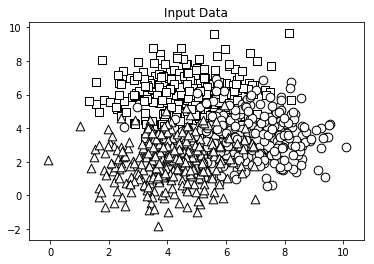

In [3]:
def scatter(classes, marker):
    pyplot.scatter(classes[:, 0], classes[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker=marker)

pyplot.figure()
scatter(classes[0], 's')
scatter(classes[1], 'o')
scatter(classes[2], '^')
pyplot.title("Input Data")
pyplot.show()

## Using the Trees

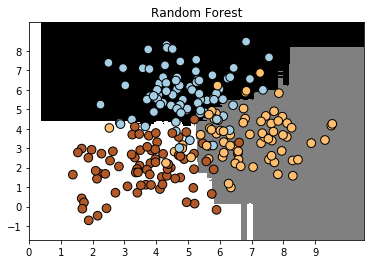

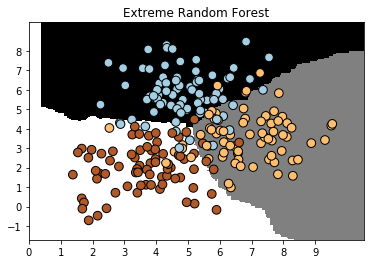

In [8]:

split = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)
feature_train, feature_test, class_train, class_test = split
    
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
extreme_random = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0)

random_forest.fit(feature_train, class_train)
extreme_random.fit(feature_train, class_train)

util.visualize_classifier(random_forest, feature_test, class_test, "Random Forest")
util.visualize_classifier(extreme_random, feature_test, class_test, "Extreme Random Forest")

In [10]:
def predict(x, y):
    forest_probabilities = random_forest.predict_proba([(x, y)])[0]
    erf_probabilities = extreme_random.predict_proba([(x, y)])[0]
    
    forest_class = "Class-{0}".format(numpy.argmax(forest_probabilities))
    erf_class = "Class-{0}".format(numpy.argmax(erf_probabilities))

    print("Probabilities:")
    print("\tRandom Forest:", forest_probabilities)
    print("\tExtreme Random Forest:", erf_probabilities)
    print()
    print("Predicted Class:")
    print("\tRandom Forest:", forest_class)
    print("\tExtreme Random Forest:", erf_class)

widgets.interactive(
    predict,
    x=widgets.FloatSlider(value=1, min=-1, max=10),
    y=widgets.FloatSlider(value=1, min=-1, max=10)
)

interactive(children=(FloatSlider(value=1.0, description='x', max=10.0, min=-1.0), FloatSlider(value=1.0, desc…